## Chapter 4: Bloch Sphere - qiskit

In [19]:
## import the libraries
import numpy as np
from qiskit import *
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.1',
 'qiskit-aer': '0.7.2',
 'qiskit-ignis': '0.5.1',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.1',
 'qiskit': '0.23.2'}

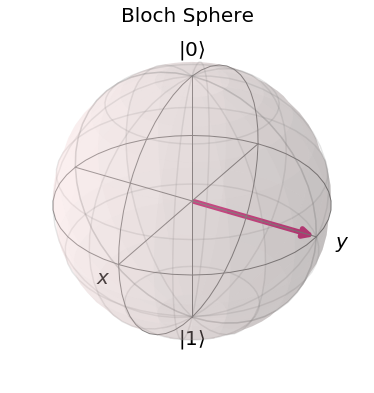

In [42]:
from qiskit.visualization import plot_bloch_vector
%matplotlib inline

plot_bloch_vector([0,1,0], title="Bloch Sphere")

In [43]:
from math import pi
from qiskit.visualization import plot_bloch_multivector

In [44]:
#X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘

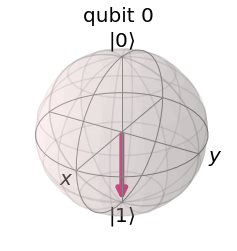

In [45]:
# Veify The result
backend = Aer.get_backend('statevector_simulator') # Simulate circuit
out = execute(qc,backend).result().get_statevector() # Do the simulation, returning the statevector
plot_bloch_multivector(out) # Display the output state vector

In [46]:
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw()

┌───┐┌───┐┌───┐
q_0: ┤ X ├┤ Y ├┤ Z ├
     └───┘└───┘└───┘

In [47]:
# Create Hadamard gate for the X-measurement function:
def x_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc

initial_state = [0,1]
# Initialise our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

┌─────────────────┐┌───┐┌─┐┌───┐
q_0: ┤ initialize(0,1) ├┤ H ├┤M├┤ H ├
     └─────────────────┘└───┘└╥┘└───┘
c: 1/═════════════════════════╩══════
                              0

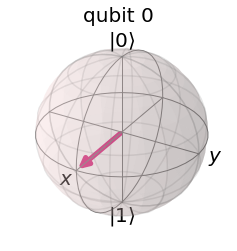

In [51]:
#Result of the Z to X- gate basis transfer 
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
out_state = execute(qc,backend).result().get_statevector() # Do the simulation, returning the state vector
plot_bloch_multivector(out_state) # Display the output state vector

If the above particular jupyter notebook cell is run again then you may see different results - however the final state of the qubit will always be  |+⟩  or  |−⟩ . The qubit was initialised in the state  |1⟩ and as a result of performing a measurement it collapsed to states  |+⟩  or  |−⟩ . 

In [52]:
# quantum circuit to create a Bell state
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = bell + meas
result = execute(circ, backend, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'00': 481, '11': 519}


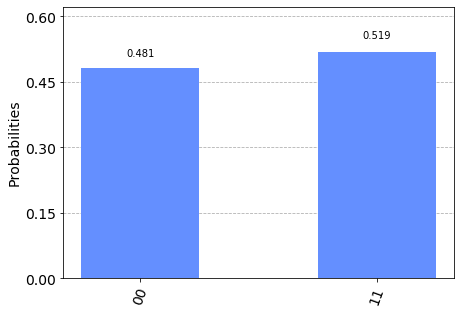

In [54]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)